## About dataset
Iris flower has three species, namely, setosa, versicolor and virginica. These species differ in size. In this dataset, we have the measurements of the iris flowers according to their species. The task here is to train a machine learning model that can learn from the measurements of the iris species and classify them.

## Problem Statement
Classification of flower species based on its measurements

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Explore data

In [3]:
df.shape

(150, 6)

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Observations
* There are 150 rows and 6 columns in the dataset.
* There are neither any duplicate values nor any missing values.
* Except 'Species', all columns are numerical.

## Data preprocessing

* ### Drop unimportant column

In [8]:
df.drop('Id', axis = 1, inplace = True)

* ### Changing categorical column into numerical

In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df['Species'] = df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [11]:
# Viewing changes
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data visualization

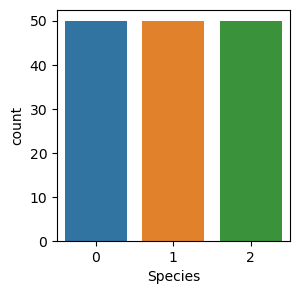

In [12]:
plt.figure(figsize=(3,3))
sns.countplot(df['Species'])
plt.show()

The given dataset is balanced. It has equal number of all species.

<Figure size 800x800 with 0 Axes>

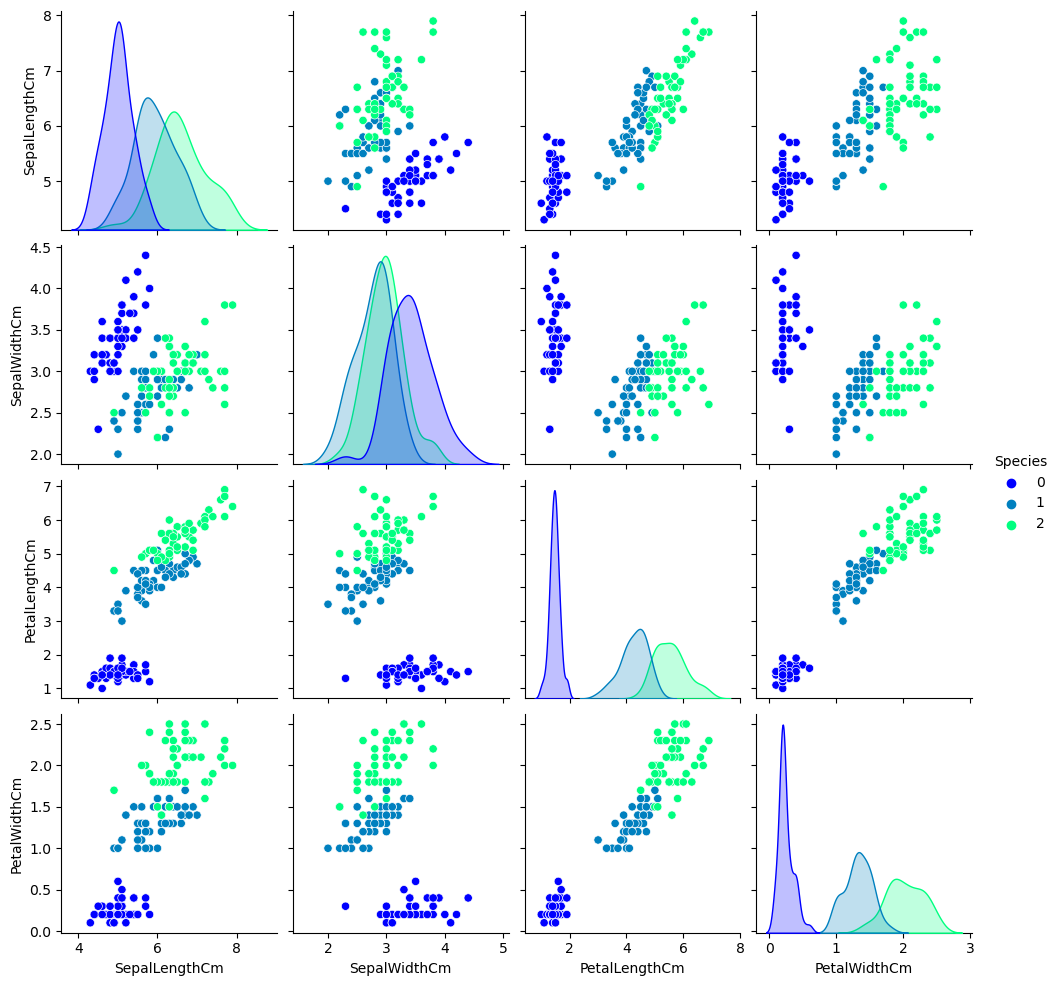

In [13]:
plt.figure(figsize=(8,8))
sns.pairplot(df, hue = 'Species', palette = 'winter')
plt.show()

Setosa species seems smaller in size compared to other species. Virginica is the largest of all.

<AxesSubplot:>

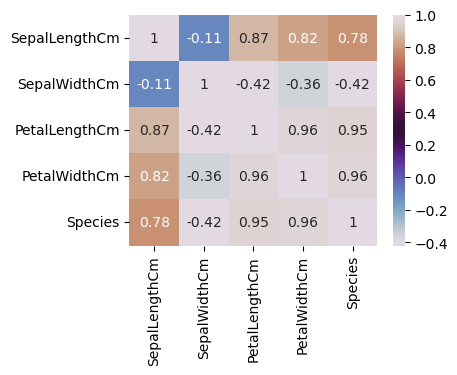

In [14]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(), annot=True, cmap= 'twilight')

Target column 'Species' is strongly related to petal length and petal width.

## Building Model: Support Vector Classifier (SVC)

In [15]:
# Define dependent and independent variable
x = df.iloc[:,:-1]
y = df['Species']

In [16]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(x)

In [17]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30, random_state=21)

In [18]:
# Hyperparameter optimization using GridSearchCV

from sklearn.svm import SVC
classifier = SVC() #estimator

parameters = [{"C":[1,10,100,1000],
              "kernel":["sigmoid", "rbf","poly"],
              "gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}] #parameters

from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = "accuracy", cv = 10, n_jobs = -1, verbose = 1) 
                  
gd.fit(xtrain, ytrain) #fitting data            

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['sigmoid', 'rbf', 'poly']}],
             scoring='accuracy', verbose=1)

In [19]:
print('Best parameters are: ', gd.best_params_)
print('Score of the model is: ', gd.best_score_)

Best parameters are:  {'C': 100, 'gamma': 0.5, 'kernel': 'poly'}
Score of the model is:  0.99


In [20]:
# Building SVC model usig best parameters 
classifier_best = SVC(C = 100, gamma= 0.5, kernel= 'poly')
# Fitting data
classifier_best.fit(xtrain,ytrain)

SVC(C=100, gamma=0.5, kernel='poly')

In [21]:
# Prediction
ypred = classifier_best.predict(xtest)

In [22]:
# Evaluating model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy of the model is: ', round(accuracy_score(ytest,ypred)*100,2), '%.')
print('--------------------------------------------')
print('Confusion matrix: \n', confusion_matrix(ytest, ypred))
print('--------------------------------------------')
print('Classification report: \n', classification_report(ytest, ypred))

Accuracy of the model is:  93.33 %.
--------------------------------------------
Confusion matrix: 
 [[14  0  0]
 [ 0 13  3]
 [ 0  0 15]]
--------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.81      0.90        16
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



### Acuracy of this model is 93%.